In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1) #Número de equipos afectados
y = 4 + 3 * X + np.random.randn(100, 1) #Coste del incidente    

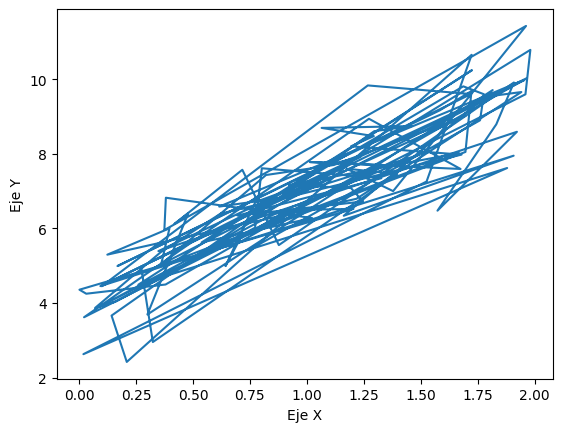

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,y)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

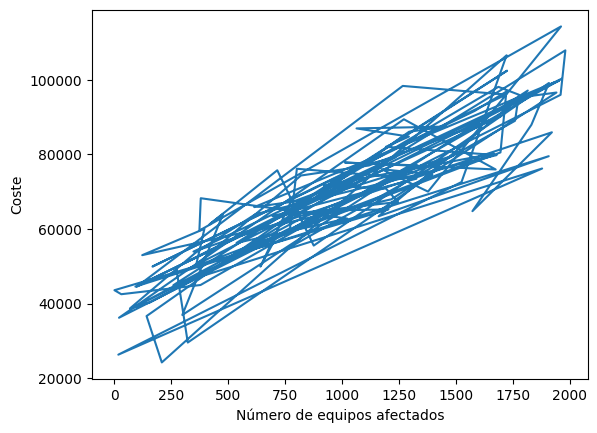

In [3]:
import pandas as pd
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # Crea un diccionario usando flatten para aplanar el array
#TODO convierte data en un DataFrame df de pandas
df = pd.DataFrame(data)
df.head(10) # Comprueba el resultado
#TODO escala el número de equipos afectados (*1000) y el coste (*10000) y conviértelos a int.
df['n_equipos_afectados'] = (df['n_equipos_afectados'] * 1000).astype(int)
df['coste'] = (df['coste'] * 10000).astype(int)
#TODO vuelve a representarlo gráficamente
plt.plot(df['n_equipos_afectados'], df['coste'])
plt.xlabel('Número de equipos afectados')
plt.ylabel('Coste')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
# TODO entrena con lin_reg.fit(). La cual recibe las variables de entrada (en este caso solo tenemos una columna X), y la variable de salida y. Comprueba cómo hacerlo en fit
# Nota: Tendrás que hacer un .reshape(-1, 1) a la variable X (equipos afectados)
X_train = df['n_equipos_afectados'].values.reshape(-1, 1)
y_train = df['coste'].values
lin_reg.fit(X_train, y_train)
# Una vez entrenado puedes obtener theta 0
theta_0 = lin_reg.intercept_
# y un array con theta 1... theta n (en este caso solo tenemos uno)
theta_1 = lin_reg.coef_[0]

print(f"theta_0: {theta_0}, theta_1: {theta_1}")

theta_0: 39879.945368487904, theta_1: 29.45598123969577


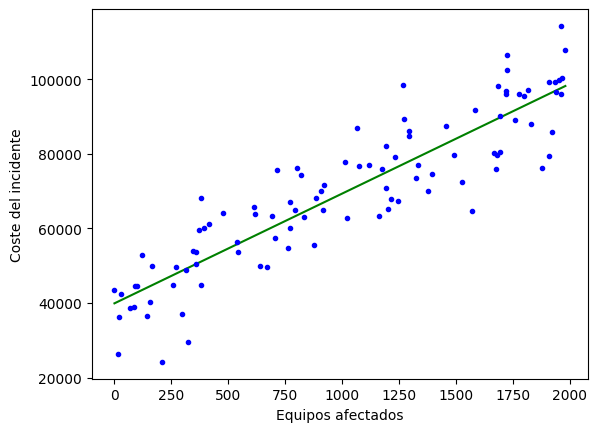

In [5]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)
# Gráfica
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

In [6]:
# Comprueba cómo hacerlo en predict
x_new = np.array([[1300]])  # para 1300 equipos afectados
coste = lin_reg.predict(x_new)
print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 78172 €


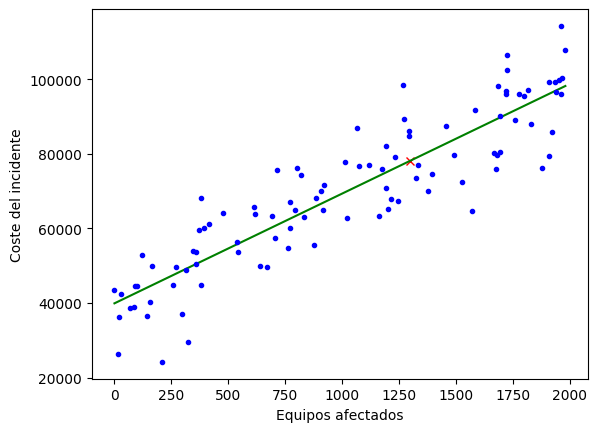

: 

In [ ]:
#TODO  Vuelve a mostrar la gráfica anterior, pero ahora añade el punto predicho:
plt.plot(x_new, coste, "rx")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()